In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from bremsstrahlung import nr_dif_cs_sp, factor_Elwert
from screening import Fermi_length
from SeltzerBerger import read_data

# Style of the plot
plt.style.use('../../utils/minimal.style')

In [2]:
# Physical parameters
Z = 29
T1 = 100. # 100 keV
g1 = 1. + T1 / 511.
Lf = Fermi_length(Z)

In [3]:
# discretization of k axis
Nk = 100
axis_k  = np.linspace(0., g1-1., Nk)

In [4]:
# Elwert factor
elwert = np.array([ factor_Elwert(Z, k, g1) for k in axis_k ])

In [5]:
# Non-relativistic cross-section with Elwert correction
cs_screen_elwert_on = np.array([ nr_dif_cs_sp(Z, k, g1, Lf, elwert=True) for k in axis_k ])
cs_screen_elwert_on = axis_k * cs_screen_elwert_on

In [6]:
# Non-relativistic cross-section without Elwert correction
cs_screen_elwert_no = np.array([ nr_dif_cs_sp(Z, k, g1, Lf, elwert=False) for k in axis_k ])
cs_screen_elwert_no = axis_k * cs_screen_elwert_no

In [7]:
# Data from Seltzer and Berger
cs_absx, cs_seltzer = read_data(Z)

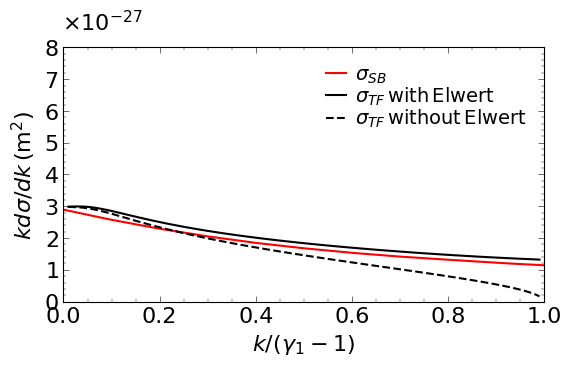

In [8]:
# Figure with non-relativistic cross-section with and without the Elwert correction

fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(cs_absx,cs_seltzer[6], c='r', label=r"$\sigma_{SB}$")
axs.plot(axis_k[1:-1] / (g1 - 1.), cs_screen_elwert_on[1:-1], c='k', label=r"$\sigma_{TF} \, \rm with \, \rm Elwert$")
axs.plot(axis_k[1:-1] / (g1 - 1.), cs_screen_elwert_no[1:-1], c='k', ls='--', label=r"$\sigma_{TF} \, \rm without \, \rm Elwert$")

# x axis
axs.set_xlabel(r"$ k / (\gamma_1 - 1) $")
axs.set_xlim([0.,1.])

# y axis
axs.set_ylabel(r"$ k d \sigma / dk \, \rm (m^2)$")
axs.set_ylim([0.,8.e-27])
location = np.linspace(0., 8.e-27, 9)
axs.yaxis.set_ticks(location)
axs.yaxis.set_ticklabels([r'${0:.{1}f}$'.format(1.e27*elem, 0) for elem in location])
axs.text(0.08, 1.1, r'$ \times 10^{-27} $', ha='center', va='center', transform=axs.transAxes, bbox=dict(alpha=0, facecolor="white", edgecolor="white") )

# legend
axs.legend(loc="best")
plt.tight_layout()
# save the figure
fig.savefig("../figures/Elwert_correction", bbox_inches='tight')

plt.show()